# Python: Images & pixels

The goal of these sections is to provide an interactive illustration of image analysis concepts through the popular [Python](https://www.python.org) programming language.

:::{admonition} Feel free to skip this!
:class: tip

If you're more interested in concepts and/or ImageJ, I would recommend skipping the Python chapters at the beginning - you don't need them to follow the rest of the book.
:::

However, if you *are* interested, I hope these sections can help provide an alternative view of image analysis.

Even if you've never coded before, working through the examples will hopefully give you both a deeper understanding of image processing and some useful programming skills.

This page will introduce reading and displaying images.
Later Python chapters in the handbook will build on these foundations.

:::{admonition} Make it interactive!
:class: tip

Before continuing, you should [make the notebook interactive](sec-live-notebooks) so that you can run the code yourself - and explore what happens if you make changes.

:::

:::{admonition} Python overview
If you want a quick introduction to Python, check out the [Python Primer](../../appendices/python/python.md) section.
:::

## Read & show an image using Python <a name="show-image-in-python" />

Let's begin by loading an image in Python, and then showing it using [matplotlib](https://matplotlib.org).

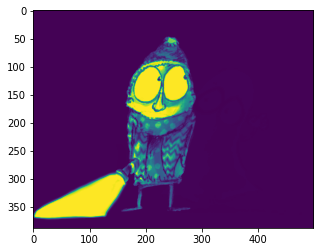

In [1]:
"""
Read and display an image in Python.
"""

# In Python, we need to import things before we can use them
# (And, often, google to find out what we ought to be importing, 
# then copy & paste the same import statements a lot)
import matplotlib.pyplot as plt
from imageio import imread

# Read an image - we need to know the full path to wherever it is
im = imread('../../../images/spooked.png')

# Create a plot of the image using the default brightness/contrast min/max and colormap
plt.imshow(im)

# Actually show the plot (if we don't do this explicitly, it might display anyway - but not always)
plt.show()

### Changing lookup tables

The key method here is `plt.imshow`.
We can pass additional parameters to customize the display in many ways.

To see what is possible, I usually start to type the name and then press {kbd}`Shift+Tab` to prompt some documentation to appear.
```
plt.imshow(
```
Alternatively, you can run either of the following lines
```
?plt.imshow
help(plt.imshow)
```
to display some help text.

In [2]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)
    Display data as an image, i.e., on a 2D regular raster.
    
    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displaying a grayscale
    image set up the colormapping using the parameters
    ``cmap='gray', vmin=0, vmax=255``.
    
    The number of pixels used to render an image is set by the Axes size
    and the *dpi* of the figure. This can lead to aliasing artifacts when
    the image is resampled because the displayed image size will usually
    not match the size of *X* (see
    :doc:`/gallery/images_contours_and_fields/image_antialiasing`).
    The resampling can be controlled via the *interpolation* parameter
    and/or 

This can sometimes reveal an overwhelming amount of information, and it can take a bit of time to figure out how to identify the key bits.

The important plotting options for our purposes are 
* `cmap` to change the colormap (LUT)
* `vmin` to change the pixel value corresponding to the first color in the colormap
* `vmax` to change the pixel value corresponding to the last color in the colormap

The last two options control the brightness/contrast.

Try running the following code cells to see the effect, and try out other changes.

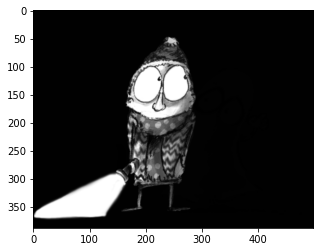

In [3]:
"""
Display an image with different brightness/contrast.
(Be sure to run the cells above before this one!)
"""

# Display the image with a grayscale colormap
plt.imshow(im, cmap='gray')
plt.show()

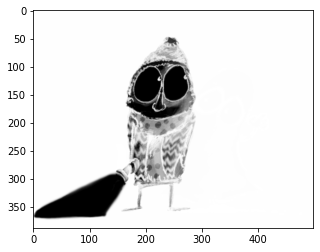

In [4]:
# Create an X-ray by adding '_r' to 'reverse' the colormap
plt.imshow(im, cmap='gray_r')
plt.show()

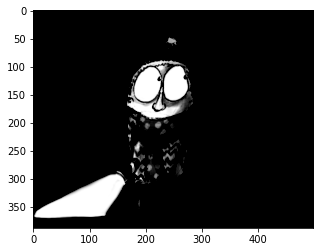

In [5]:
# Display the image with a grayscale colormap and modified brightness/contrast
plt.imshow(im, cmap='gray', vmin=100, vmax=255)
plt.show()

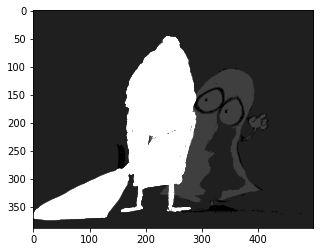

In [6]:
# Display the image with a grayscale colormap and modified brightness/contrast
plt.imshow(im, cmap='gray', vmin=0, vmax=8)
plt.show()

There are many more colormaps available in matplotlib -- for details, see https://matplotlib.org/stable/tutorials/colors/colormaps.html

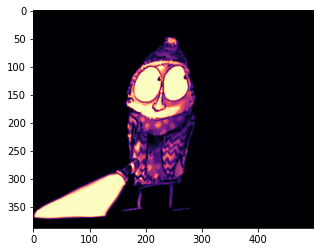

In [7]:
# Display with a 'perceptually uniform colormap'
plt.imshow(im, cmap='magma')
plt.show()

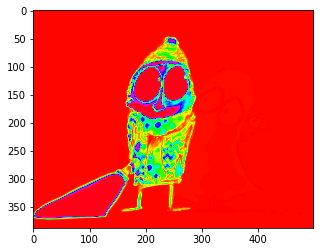

In [8]:
# Display with a colormap that is, frankly, not very helpful here
plt.imshow(im, cmap='hsv')
plt.show()

As you can see, the image may look *very* different depending upon the colormap and min/max values used.

However, it's crucial that *we haven't modified the original image data itself*.

To check this, try showing the image as we did initially - to make sure it looks the same.

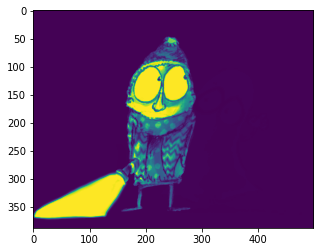

In [9]:
# Display the image as before
plt.imshow(im)
plt.show()

### Further customizing image display

Lots more can be done to customize appearance.

In order to standardize things throughout this book, I normally turn off the outer axis (numbers around the boundary), set an image title, and use a grayscale lookup table.

The code to do this is shown below.

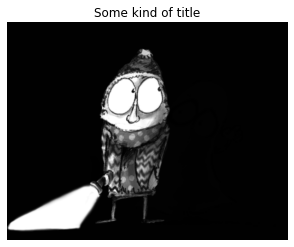

In [10]:
# Load and display an image with a title & no visible axis
im = imread('../../../images/spooked.png')

plt.imshow(im, cmap='gray')
plt.axis(False)
plt.title('Some kind of title')
plt.show()

### Writing functions

If you use the same customizations frequently, it helps to **define a function** that applies them.
Then you don't need to copy and paste the same lines of code frequently; rather, you just call the function instead.

> The function definition starts with `def`. It is followed by
> * The function name
> * Parameters (within parentheses), sometimes with default values
> * A colon
> * The main code that implements the function - this needs to be indented (something Python is *very* fussy about)

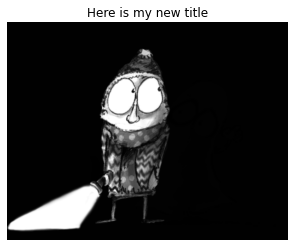

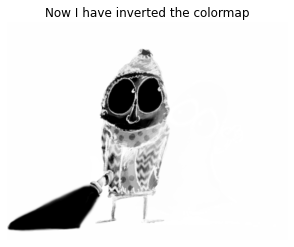

In [11]:
def my_imshow(im, title=None, cmap='gray'):
    """
    Call imshow and turn the axis off, optionally setting a title and colormap.
    The default colormap is 'gray', and there is no default title.
    """
    
    # Show image & turn off axis
    plt.imshow(im, cmap=cmap)
    plt.axis(False)
    
    # Show a title if we have one
    if title is not None:
        plt.title(title)
        
    plt.show()
    
# Now I just need to call my function rather than customize every plot
my_imshow(im, title='Here is my new title')
my_imshow(im, title='Now I have inverted the colormap', cmap='gray_r')

### Helper functions in this book

I've written several helper functions to standardize image display throughout this handbook.
They aren't part of any wider Python library, but we can use them here to make our scripts shorter and focus on the more important concepts.

To use these helper functions, we need to import them once per Jupyter notebook.
Then we can use the methods such as `load_image` and `show_image` (along with companions like `show_histogram`) to display images.

In [12]:
# Default imports (they are already included at the top of the page)
import sys
sys.path.append('../../../')
from helpers import *

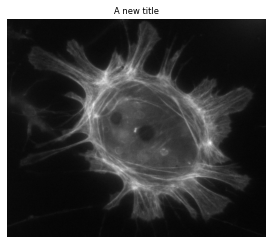

In [13]:
# Easier way to load and display an image, which we'll use from now on
im = load_image('sunny_cell.tif')
show_image(im, title='A new title')